# CROP YIELD PREDICTION

# importing libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [61]:
dataframe = pd.read_csv("C:/Users/ASUS/Downloads/final_data.csv") #laoding yield data 

# Exploratory Data Analysis(EDA)

In [62]:
dataframe

,District,Crop,Year,Area,Production,Yield,RH2M,GWETTOP,T2M_MAX,T2M_MIN,GWETROOT,WS2M_MAX,WS2M_MIN,PRECTOTCORR
0,Jhapa,Paddy,197980,87070,148020.0,1700,65.38,0.61,38.30,8.25,0.62,7.17,0.02,5.27
1,Jhapa,Paddy,198081,87000,152250.0,1750,62.19,0.59,40.09,7.88,0.60,6.55,0.02,5.27
2,Jhapa,Paddy,198182,91380,137070.0,1500,55.19,0.52,40.82,6.88,0.55,9.45,0.02,5.27
3,Jhapa,Paddy,198283,84350,126570.0,1501,59.56,0.56,41.83,6.31,0.59,8.33,0.05,5.27
4,Jhapa,Paddy,198384,90860,160820.0,1770,59.25,0.55,40.69,6.08,0.59,7.30,0.02,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Kapilbastu,Wheat,201718,25667,102456.0,3988,53.81,0.49,42.40,4.72,0.52,8.21,0.05,5.27
2096,Kapilbastu,Wheat,201819,25667,103935.0,4050,58.50,0.53,45.02,5.39,0.55,9.67,0.04,5.27
2097,Kapilbastu,Wheat,201920,26118,103167.0,3950,62.00,0.56,43.95,5.13,0.57,7.41,0.03,5.27
2098,Kapilbastu,Wheat,202021,26725,99085.0,3710,61.69,0.60,42.00,6.59,0.63,8.12,0.01,6.31


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     2100 non-null   object 
 1   Crop         2100 non-null   object 
 2   Year         2100 non-null   int64  
 3   Area         2100 non-null   int64  
 4   Production   2100 non-null   float64
 5   Yield        2100 non-null   int64  
 6   RH2M         2100 non-null   float64
 7   GWETTOP      2100 non-null   float64
 8   T2M_MAX      2100 non-null   float64
 9   T2M_MIN      2100 non-null   float64
 10  GWETROOT     2100 non-null   float64
 11  WS2M_MAX     2100 non-null   float64
 12  WS2M_MIN     2100 non-null   float64
 13  PRECTOTCORR  2100 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 229.8+ KB


In [7]:
# Group by Item to find the total yield for each food item
total_yield_per_item = dataframe.groupby('Crop')['Yield'].sum().sort_values(ascending=False)

print(total_yield_per_item)

Crop
Paddy     1116637
Maize      946746
Wheat      877230
Millet     429820
Barley     400254
Name: Yield, dtype: int64


In [9]:
# Group by Year to find the total yield for each year
total_yield_per_year = dataframe.groupby('Year')['Yield'].sum().sort_values(ascending=False)

print(total_yield_per_year)

Year
202021    133630
201920    131080
201819    127860
202122    126230
201718    120132
201617    112461
201314    111840
201415    107340
201516    106110
201213    106035
201112    104325
199293     97813
201011     94759
200809     93448
200708     92320
200304     91921
200405     90907
200607     90416
200506     89674
200203     86265
200102     86207
199899     85698
200001     84407
199900     82372
199596     81555
199697     81474
199091     80419
199192     79800
200910     79751
199798     79668
199394     77841
199495     77457
198889     75395
198384     73788
198788     70844
198485     68613
198586     67825
198687     67206
198081     65714
198182     64965
198283     64674
197980     60448
Name: Yield, dtype: int64


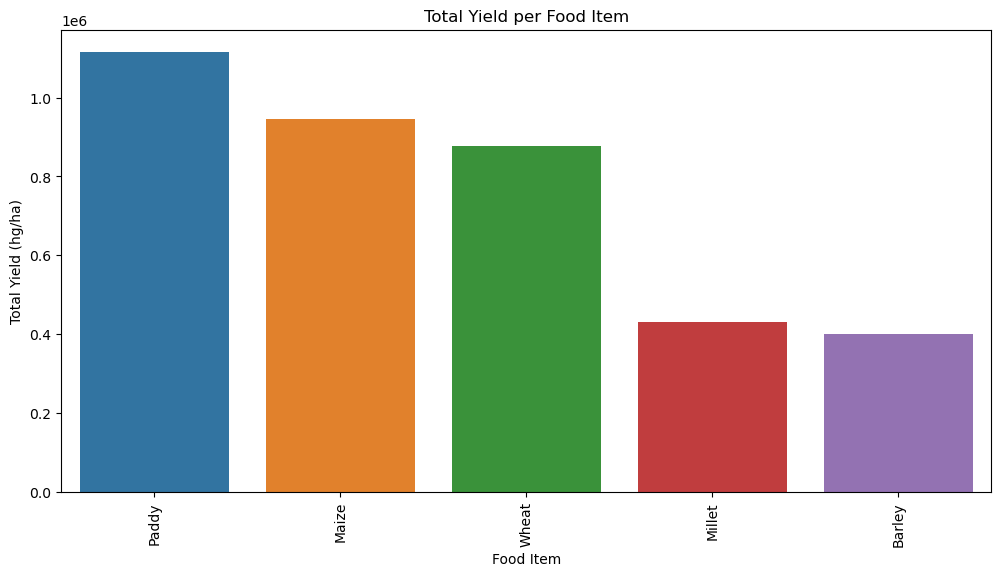

In [10]:
# Plot top yielding food items
plt.figure(figsize=(12, 6))
sns.barplot(x=total_yield_per_item.index, y=total_yield_per_item.values)
plt.xticks(rotation=90)
plt.title('Total Yield per Food Item')
plt.xlabel('Food Item')
plt.ylabel('Total Yield (hg/ha)')
plt.show()

In [12]:
dataframe.groupby(['District'],sort=True)['Yield'].sum().nlargest(10) 

District
Bara          445365
Chitwan       413399
Jhapa         404236
Rautahat      376035
Morang        370186
Sarlahi       367657
Kaski         365524
Kapilbastu    357745
Saptari       339673
Siraha        330867
Name: Yield, dtype: int64

In [16]:
# Calculate correlation
correlation = dataframe['Area'].corr(dataframe['Yield'])
print(f'Correlation between Area and Yield: {correlation}')


Correlation between Area and Yield: 0.49354856745396664


In [21]:
# Filter data for a particular district, e.g., 'District A'
district_data = dataframe[dataframe['District'] == 'Morang']
print(district_data.head())

    District   Crop    Year   Area  Production  Yield   RH2M  GWETTOP  \
850   Morang  Paddy  197980  78430    139760.0   1782  62.81     0.59   
851   Morang  Paddy  198081  78400    141100.0   1800  59.00     0.55   
852   Morang  Paddy  198182  80470    152890.0   1900  52.19     0.47   
853   Morang  Paddy  198283  74570    119180.0   1598  56.44     0.53   
854   Morang  Paddy  198384  81670    156100.0   1911  56.94     0.52   

     T2M_MAX  T2M_MIN  GWETROOT  WS2M_MAX  WS2M_MIN  PRECTOTCORR  
850    38.92     8.27      0.59      7.20      0.01         5.27  
851    40.48     8.29      0.55      6.42      0.02         5.27  
852    41.79     7.01      0.52      9.38      0.02         5.27  
853    41.79     6.19      0.55      8.27      0.03         5.27  
854    41.67     7.73      0.55      7.30      0.03         5.27  


In [23]:
# Summary statistics for area and yield
print(district_data[['Area', 'Yield']].describe())

# Summary statistics for area, yield by crop
print(district_data.groupby('Crop')[['Area', 'Yield']].describe())

               Area        Yield
count    210.000000   210.000000
mean   22975.309524  1762.790476
std    31774.618568  1051.359204
min        0.000000     0.000000
25%     1167.000000  1000.000000
50%    12425.000000  1706.000000
75%    18539.000000  2377.000000
max    98070.000000  4250.000000
        Area                                                                  \
       count          mean          std      min      25%      50%       75%   
Crop                                                                           
Barley  42.0     32.500000    38.852598      0.0      0.0     13.5     69.50   
Maize   42.0  13133.261905  3794.203133   1630.0  11785.0  14100.0  15100.00   
Millet  42.0   1287.000000   243.667606    700.0   1167.0   1300.0   1385.25   
Paddy   42.0  84629.214286  7266.146412  70150.0  79940.0  82695.0  90626.25   
Wheat   42.0  15794.571429  3513.765898   9000.0  12807.5  16100.0  17877.50   

                Yield                                         

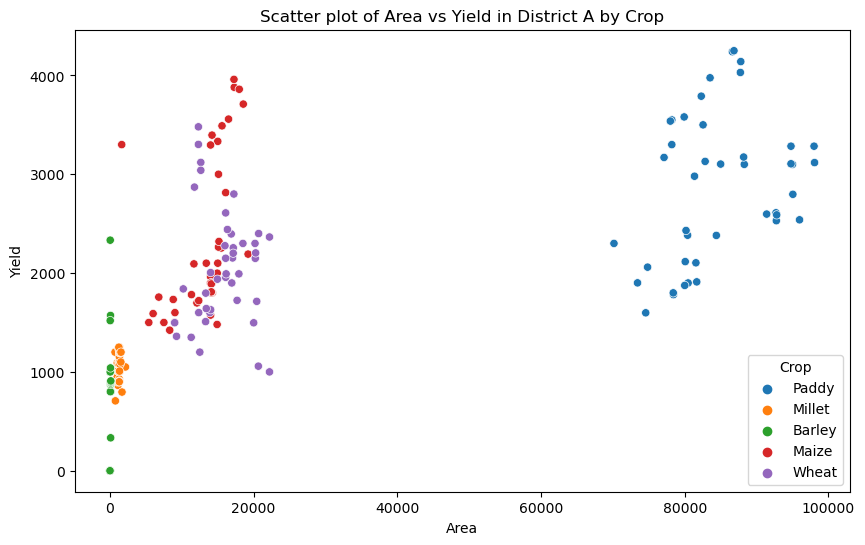

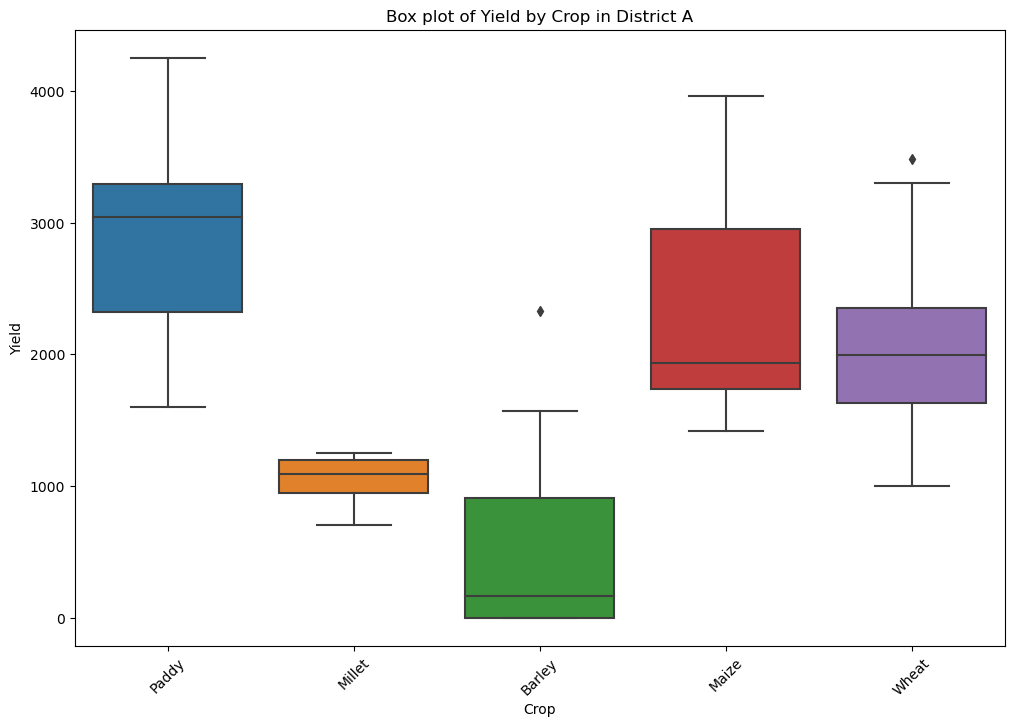

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between Area and Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Yield', hue='Crop', data=district_data)
plt.title('Scatter plot of Area vs Yield in District A by Crop')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.legend(title='Crop')
plt.show()

# Box plot to show distribution of Yield by Crop
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop', y='Yield', data=district_data)
plt.title('Box plot of Yield by Crop in District A')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.show()


In [25]:
import statsmodels.api as sm

# Define the independent variable (Area) and dependent variable (Yield)
X = district_data['Area']
y = district_data['Yield']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     150.7
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.06e-26
Time:                        12:40:04   Log-Likelihood:                -1701.4
No. Observations:                 210   AIC:                             3407.
Df Residuals:                     208   BIC:                             3413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1270.0440     68.396     18.569      0.0

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


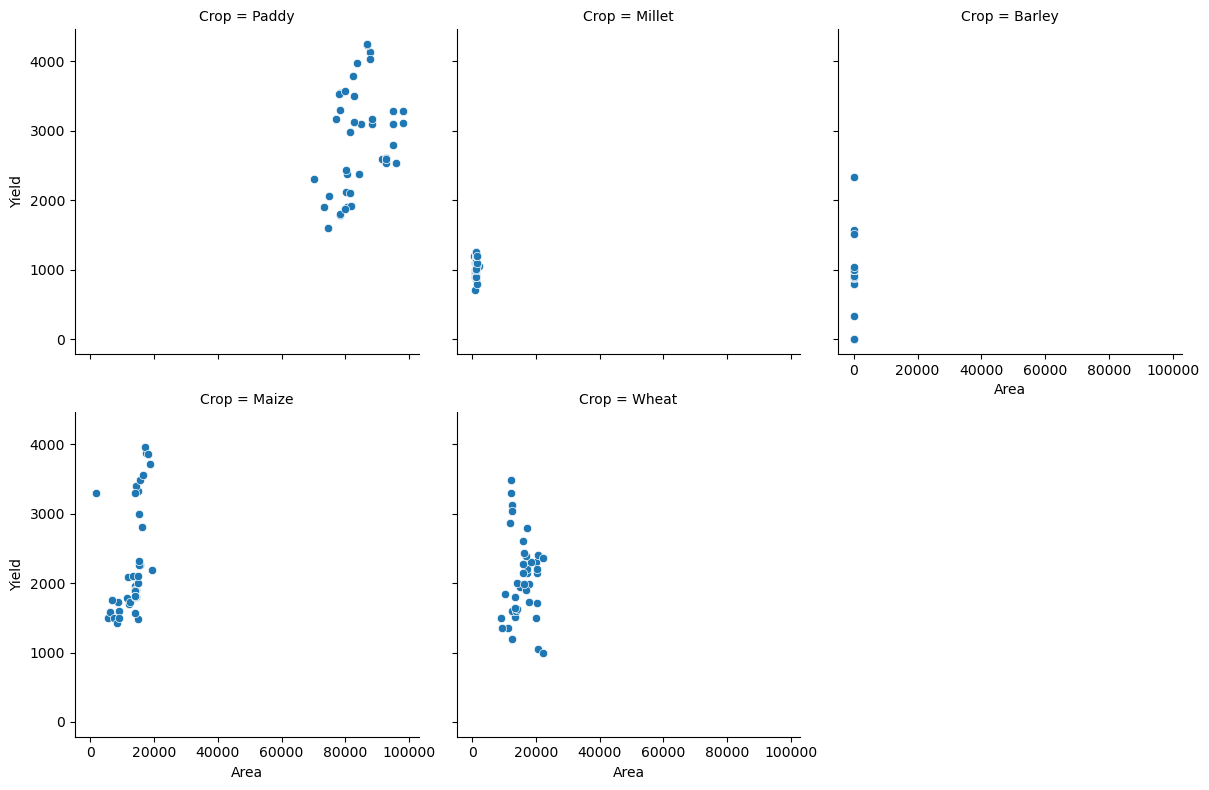

In [26]:
# Facet grid to show scatter plots for each crop
g = sns.FacetGrid(district_data, col="Crop", col_wrap=3, height=4)
g.map(sns.scatterplot, "Area", "Yield")
g.add_legend()
plt.show()


In [27]:
# Group by district and crop, then calculate the mean yield
grouped_data = dataframe.groupby(['District', 'Crop'])['Yield'].mean().reset_index()

# Display the grouped data
print(grouped_data.head())


  District    Crop        Yield
0     Bara  Barley  1052.666667
1     Bara   Maize  2725.452381
2     Bara  Millet  1102.833333
3     Bara   Paddy  3249.619048
4     Bara   Wheat  2473.357143


In [28]:
# For each district, find the crop with the highest mean yield
idx = grouped_data.groupby(['District'])['Yield'].idxmax()
max_yield_crops = grouped_data.loc[idx]

# Display the result
print(max_yield_crops)

      District   Crop        Yield
3         Bara  Paddy  3249.619048
8      Chitwan  Paddy  2997.166667
13       Jhapa  Paddy  2958.952381
18  Kapilbastu  Paddy  2248.000000
23       Kaski  Paddy  2704.047619
28      Morang  Paddy  2872.547619
33    Rautahat  Paddy  2407.785714
38     Saptari  Paddy  2402.928571
43     Sarlahi  Paddy  2445.547619
48      Siraha  Paddy  2300.000000


In [29]:
# Group by crop and calculate the sum of yield and sum of area
grouped_data = district_data.groupby('Crop').agg({'Yield': 'sum', 'Area': 'sum'}).reset_index()
print(grouped_data)


     Crop   Yield     Area
0  Barley   21508     1365
1   Maize   96549   551597
2  Millet   44868    54054
3   Paddy  120647  3554427
4   Wheat   86614   663372


In [31]:
print(dataframe.dtypes)

District        object
Crop            object
Year             int64
Area             int64
Production     float64
Yield            int64
RH2M           float64
GWETTOP        float64
T2M_MAX        float64
T2M_MIN        float64
GWETROOT       float64
WS2M_MAX       float64
WS2M_MIN       float64
PRECTOTCORR    float64
dtype: object


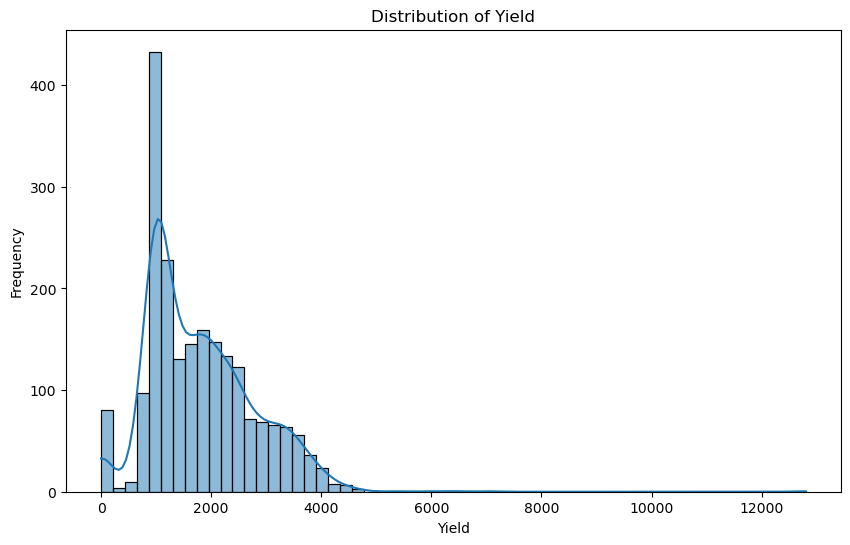

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['Yield'], kde=True)
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

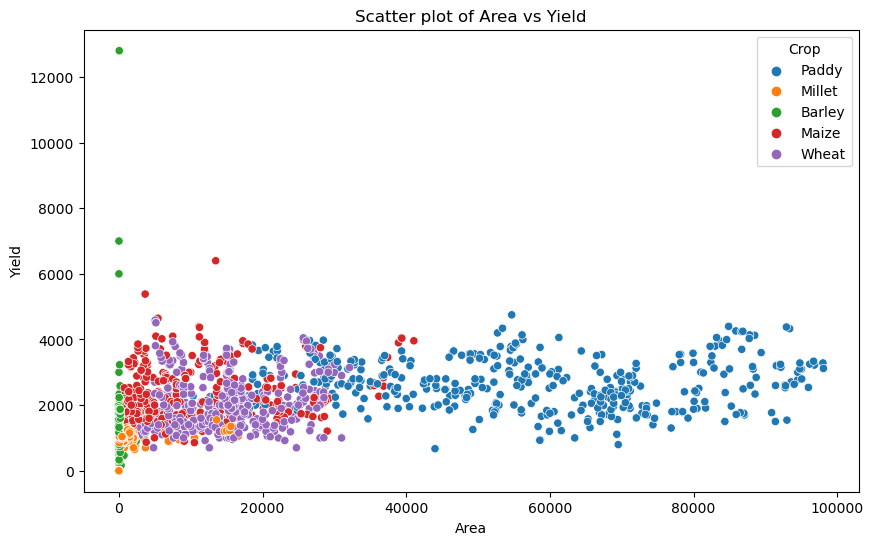

In [34]:
# Relationship between Area and Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Yield', hue='Crop', data=dataframe)
plt.title('Scatter plot of Area vs Yield')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.legend(title='Crop')
plt.show()

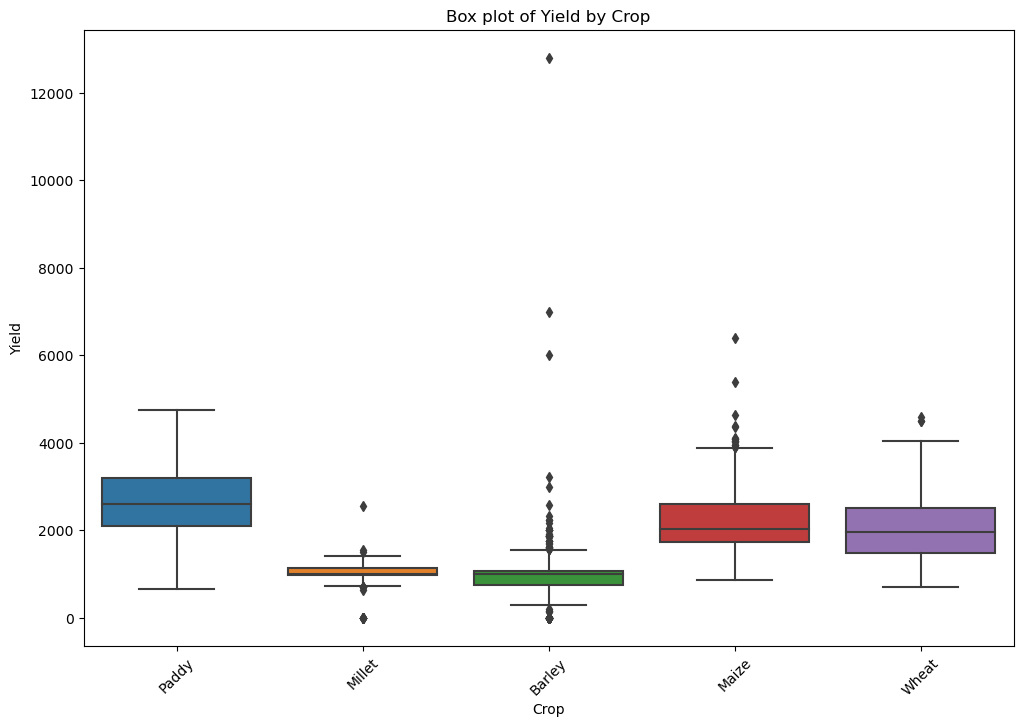

In [36]:
# Box plot of Yield by Crop
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop', y='Yield', data=dataframe)
plt.title('Box plot of Yield by Crop')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.show()


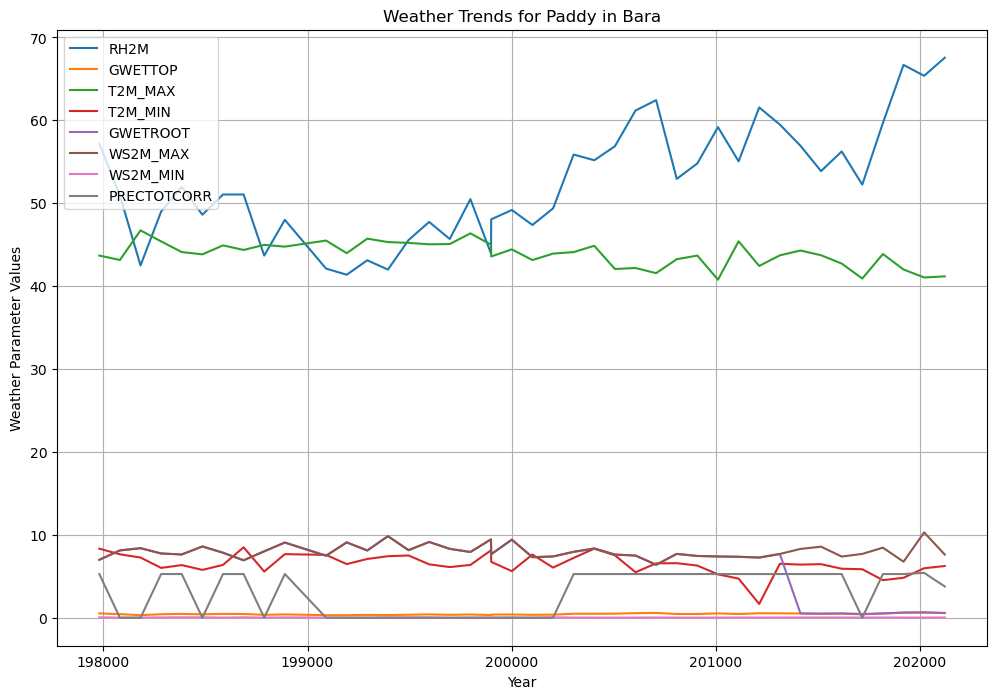

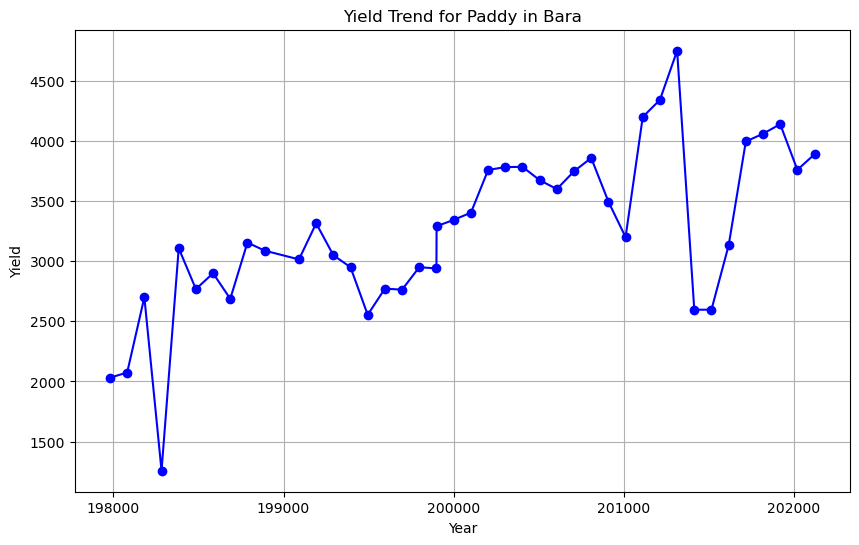

In [94]:
# Example: Filter data for a specific District and Crop
district = 'Bara'
crop = 'Paddy'
filtered_data = dataframe[(dataframe['District'] == district) & (dataframe['Crop'] == crop)]

# Group by Year and calculate mean weather parameters and Yield
grouped_data = filtered_data.groupby('Year').agg({
    'RH2M': 'mean',
    'GWETTOP': 'mean',
    'T2M_MAX': 'mean',
    'T2M_MIN': 'mean',
    'GWETROOT': 'mean',
    'WS2M_MAX': 'mean',
    'WS2M_MIN': 'mean',
    'PRECTOTCORR': 'mean',
    'Yield': 'mean'  # Assuming Yield is to be averaged over each year
}).reset_index()

# Plotting weather trends over years
plt.figure(figsize=(12, 8))

# Example: Line plots for weather parameters
plt.plot(grouped_data['Year'], grouped_data['RH2M'], label='RH2M')
plt.plot(grouped_data['Year'], grouped_data['GWETTOP'], label='GWETTOP')
plt.plot(grouped_data['Year'], grouped_data['T2M_MAX'], label='T2M_MAX')
plt.plot(grouped_data['Year'], grouped_data['T2M_MIN'], label='T2M_MIN')
plt.plot(grouped_data['Year'], grouped_data['GWETROOT'], label='GWETROOT')
plt.plot(grouped_data['Year'], grouped_data['WS2M_MAX'], label='WS2M_MAX')
plt.plot(grouped_data['Year'], grouped_data['WS2M_MIN'], label='WS2M_MIN')
plt.plot(grouped_data['Year'], grouped_data['PRECTOTCORR'], label='PRECTOTCORR')

plt.title(f'Weather Trends for {crop} in {district}')
plt.xlabel('Year')
plt.ylabel('Weather Parameter Values')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Yield trend over years
plt.figure(figsize=(10, 6))

# Example: Line plot for Yield
plt.plot(grouped_data['Year'], grouped_data['Yield'], marker='o', color='b')

plt.title(f'Yield Trend for {crop} in {district}')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

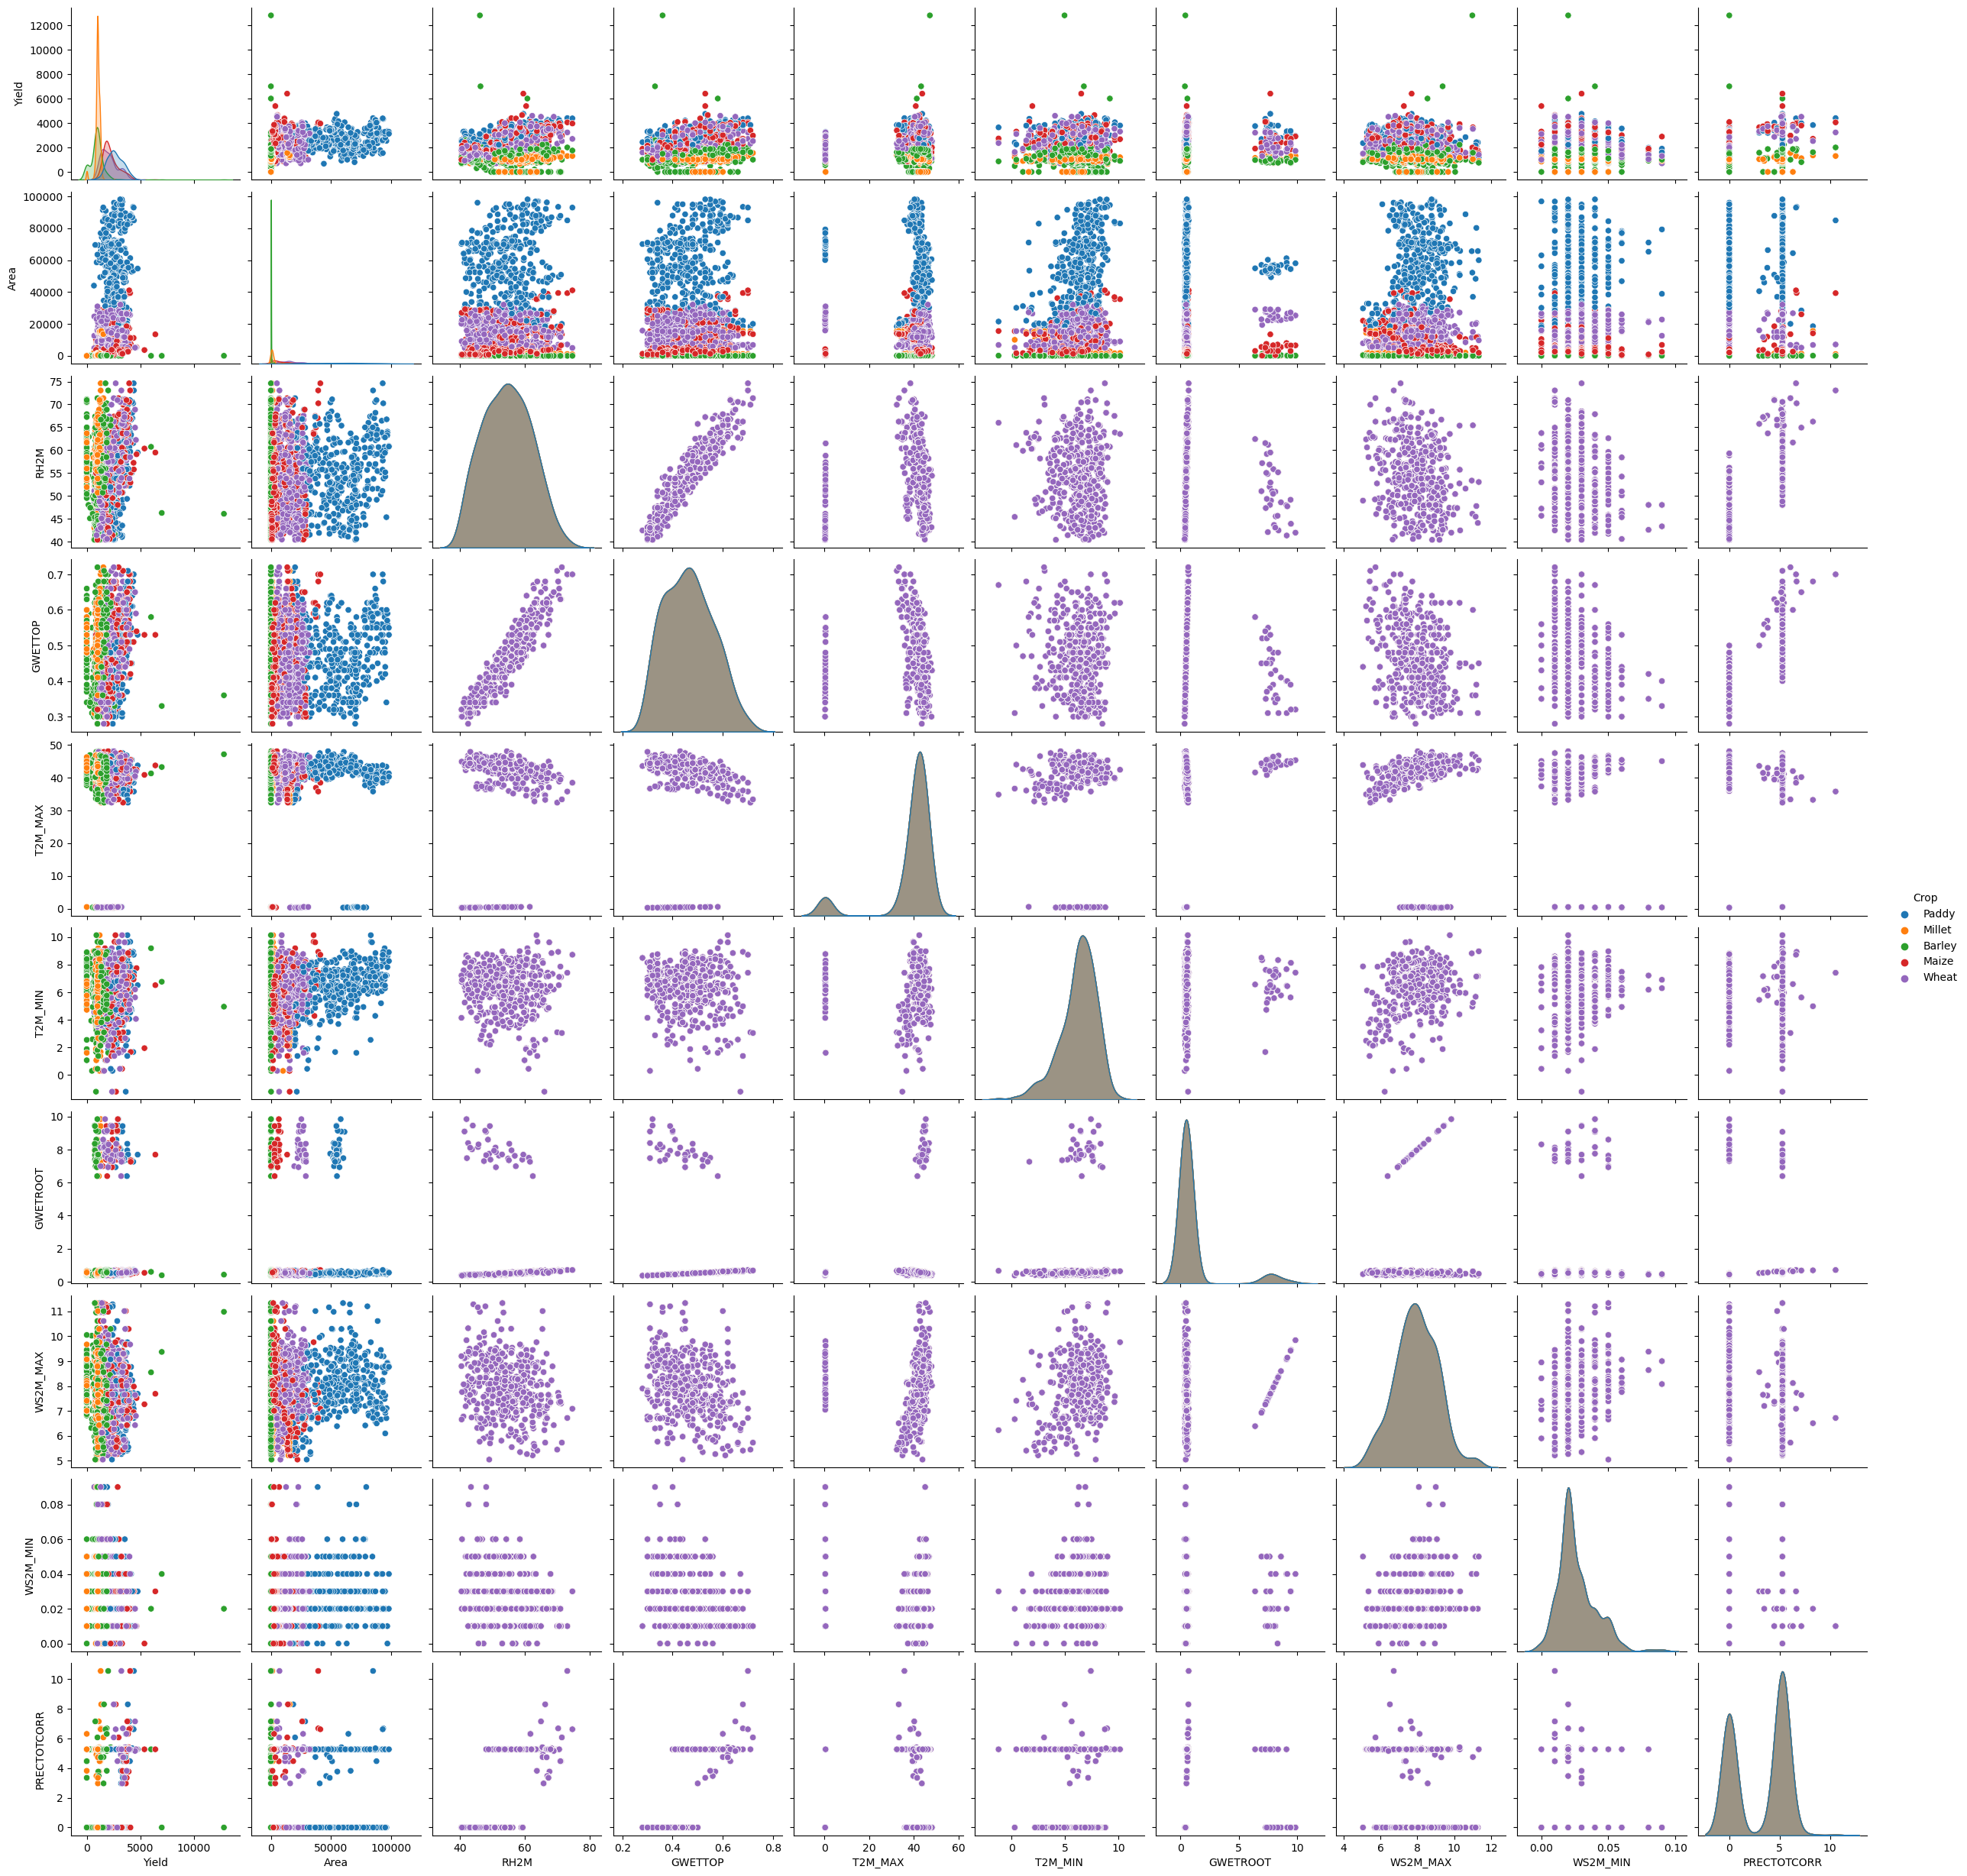

In [38]:
plt.figure(figsize=(15, 15))
sns.pairplot(dataframe, hue='Crop', vars=['Yield', 'Area', 'RH2M', 'GWETTOP', 'T2M_MAX', 'T2M_MIN', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'PRECTOTCORR'])
plt.show()

In [57]:
label_encoders = {}
for column in ['District', 'Crop']:
    le = LabelEncoder()
    dataframe[column] = le.fit_transform(dataframe[column])
    label_encoders[column] = le

# Compute the correlation matrix
correlation_matrix = dataframe.corr()

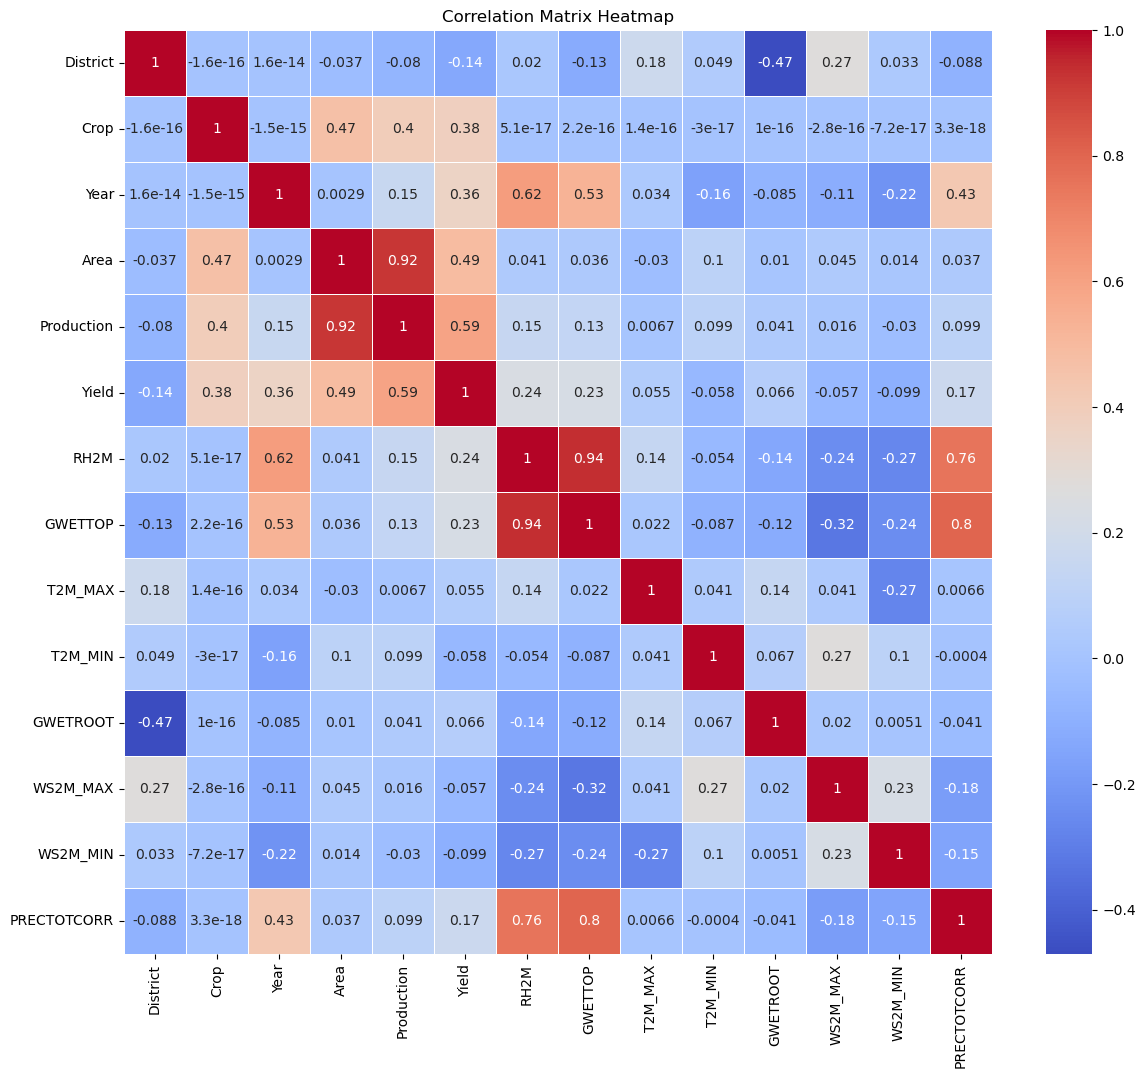

In [58]:
# Heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Group by District and Crop, then calculate the sum of yield and sum of area
grouped_data = dataframe.groupby(['District', 'Crop']).agg({'Yield': 'sum', 'Area': 'sum'}).reset_index()

In [44]:
# Display the grouped data
print(grouped_data)

      District    Crop   Yield     Area
0         Bara  Barley   44212     5684
1         Bara   Maize  114469   262178
2         Bara  Millet   46319     4594
3         Bara   Paddy  136484  2329099
4         Bara   Wheat  103881  1096462
5      Chitwan  Barley   47834    10073
6      Chitwan   Maize   98317   887227
7      Chitwan  Millet   42823    58142
8      Chitwan   Paddy  125881  1233024
9      Chitwan   Wheat   98544   354818
10       Jhapa  Barley   51512      937
11       Jhapa   Maize   90605   876802
12       Jhapa  Millet   44728    74932
13       Jhapa   Paddy  124276  3720729
14       Jhapa   Wheat   93115   427706
15  Kapilbastu  Barley   50277     6067
16  Kapilbastu   Maize   94117    62216
17  Kapilbastu  Millet   30720     6785
18  Kapilbastu   Paddy   94416  2896643
19  Kapilbastu   Wheat   88215  1035745
20       Kaski  Barley   45364     5463
21       Kaski   Maize   81965   615208
22       Kaski  Millet   50396   480251
23       Kaski   Paddy  113570   769914


In [45]:
# Find the crop with the highest sum of yield in each district
idx = grouped_data.groupby(['District'])['Yield'].idxmax()
max_yield_crops = grouped_data.loc[idx]

In [46]:
# Display the result
print("Top crop by yield in each district:")
print(max_yield_crops)

Top crop by yield in each district:
      District   Crop   Yield     Area
3         Bara  Paddy  136484  2329099
8      Chitwan  Paddy  125881  1233024
13       Jhapa  Paddy  124276  3720729
18  Kapilbastu  Paddy   94416  2896643
23       Kaski  Paddy  113570   769914
28      Morang  Paddy  120647  3554427
33    Rautahat  Paddy  101127  2000396
38     Saptari  Paddy  100923  2535170
43     Sarlahi  Paddy  102713  1842699
48      Siraha  Paddy   96600  2480390


In [49]:
district_name = 'Bara'
crop_name = 'Paddy'
district_crop_data = dataframe[(dataframe['District'] == district_name) & (dataframe['Crop'] == crop_name)]

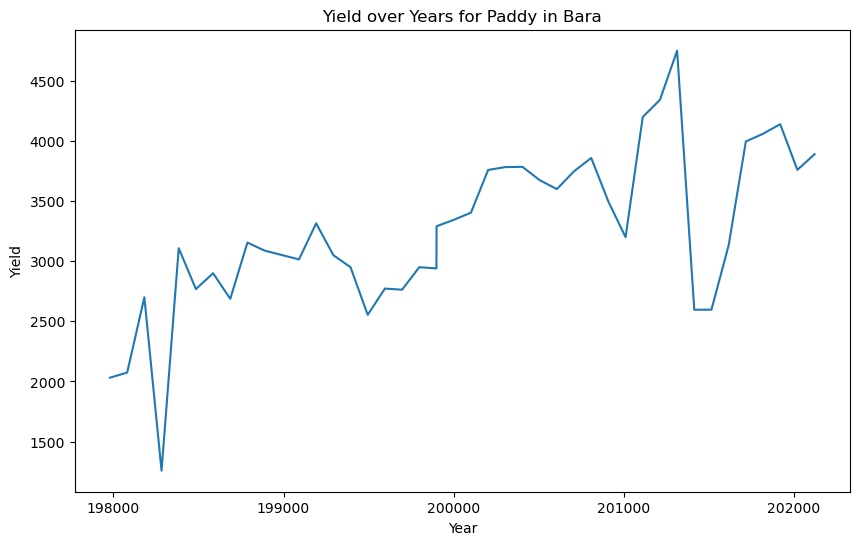

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Yield', data=district_crop_data)
plt.title(f'Yield over Years for {crop_name} in {district_name}')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

In [59]:
dataframe.isnull().sum() 

District       0
Crop           0
Year           0
Area           0
Production     0
Yield          0
RH2M           0
GWETTOP        0
T2M_MAX        0
T2M_MIN        0
GWETROOT       0
WS2M_MAX       0
WS2M_MIN       0
PRECTOTCORR    0
dtype: int64

In [63]:
#Grouping on the basis of Item  
dataframe.groupby('Crop').count()  

,District,Year,Area,Production,Yield,RH2M,GWETTOP,T2M_MAX,T2M_MIN,GWETROOT,WS2M_MAX,WS2M_MIN,PRECTOTCORR
Crop,,,,,,,,,,,,,
Barley,420,420,420,420,420,420,420,420,420,420,420,420,420
Maize,420,420,420,420,420,420,420,420,420,420,420,420,420
Millet,420,420,420,420,420,420,420,420,420,420,420,420,420
Paddy,420,420,420,420,420,420,420,420,420,420,420,420,420
Wheat,420,420,420,420,420,420,420,420,420,420,420,420,420


In [65]:
dataframe['District'].nunique()  

10

In [67]:
dataframe.groupby(['District'],sort=True)['Yield'].sum().nlargest(10) 

District
Bara          445365
Chitwan       413399
Jhapa         404236
Rautahat      376035
Morang        370186
Sarlahi       367657
Kaski         365524
Kapilbastu    357745
Saptari       339673
Siraha        330867
Name: Yield, dtype: int64

In [68]:
dataframe.groupby(['Crop','District'],sort=True)['Yield'].sum().nlargest(10)

Crop   District
Paddy  Bara        136484
       Chitwan     125881
       Jhapa       124276
       Morang      120647
Maize  Bara        114469
Paddy  Kaski       113570
Wheat  Bara        103881
Paddy  Sarlahi     102713
       Rautahat    101127
       Saptari     100923
Name: Yield, dtype: int64

# one hot encoder

In [69]:
from sklearn.preprocessing import OneHotEncoder  
  
dataframe_main_onehot = pd.get_dummies(dataframe, columns=['District',"Crop"], prefix = ['District',"Crop"])  
features=dataframe_main_onehot.loc[:, dataframe_main_onehot.columns != 'Yield']  
label=dataframe['Yield']  
features.head()  

,Year,Area,Production,RH2M,GWETTOP,T2M_MAX,T2M_MIN,GWETROOT,WS2M_MAX,WS2M_MIN,...,District_Morang,District_Rautahat,District_Saptari,District_Sarlahi,District_Siraha,Crop_Barley,Crop_Maize,Crop_Millet,Crop_Paddy,Crop_Wheat
0,197980,87070,148020.0,65.38,0.61,38.30,8.25,0.62,7.17,0.02,...,False,False,False,False,False,False,False,False,True,False
1,198081,87000,152250.0,62.19,0.59,40.09,7.88,0.60,6.55,0.02,...,False,False,False,False,False,False,False,False,True,False
2,198182,91380,137070.0,55.19,0.52,40.82,6.88,0.55,9.45,0.02,...,False,False,False,False,False,False,False,False,True,False
3,198283,84350,126570.0,59.56,0.56,41.83,6.31,0.59,8.33,0.05,...,False,False,False,False,False,False,False,False,True,False
4,198384,90860,160820.0,59.25,0.55,40.69,6.08,0.59,7.30,0.02,...,False,False,False,False,False,False,False,False,True,False


In [70]:
#Dropping the year column  
features= features.drop(['Year'], axis=1)  
  
features.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 2100 non-null   int64  
 1   Production           2100 non-null   float64
 2   RH2M                 2100 non-null   float64
 3   GWETTOP              2100 non-null   float64
 4   T2M_MAX              2100 non-null   float64
 5   T2M_MIN              2100 non-null   float64
 6   GWETROOT             2100 non-null   float64
 7   WS2M_MAX             2100 non-null   float64
 8   WS2M_MIN             2100 non-null   float64
 9   PRECTOTCORR          2100 non-null   float64
 10  District_Bara        2100 non-null   bool   
 11  District_Chitwan     2100 non-null   bool   
 12  District_Jhapa       2100 non-null   bool   
 13  District_Kapilbastu  2100 non-null   bool   
 14  District_Kaski       2100 non-null   bool   
 15  District_Morang      2100 non-null   b

# DATA NORMALIZATION

In [71]:
from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler()  
features=scaler.fit_transform(features)  

# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

# TRANING

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def compare_models(model):  
    model_name = model.__class__.__name__  
    fit=model.fit(train_data,train_labels)  
    y_pred=fit.predict(test_data)  
    r2=r2_score(test_labels,y_pred)
    mae = mean_absolute_error(test_labels, y_pred)
    mse = mean_squared_error(test_labels, y_pred)
    rmse = np.sqrt(mse)
    return([model_name,r2,mae, mse, rmse])  
  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn import svm  
from sklearn.tree import DecisionTreeRegressor  
  
models = [  
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),  
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),  
    svm.SVR(),  
   DecisionTreeRegressor()  
]  
  
model_train=list(map(compare_models,models))  
  
print(*model_train, sep = "\n") 

['GradientBoostingRegressor', 0.8887401600532301, 148.8436811131207, 96071.63017711132, 309.9542388435934]
['RandomForestRegressor', 0.7450252547545855, 345.0281993914861, 220167.8470995481, 469.2204674772277]
['SVR', 0.07772840671769765, 710.8835415533072, 796371.2286038112, 892.3963405369899]
['DecisionTreeRegressor', 0.49537821936882154, 217.62857142857143, 435735.2761904762, 660.1024740072379]


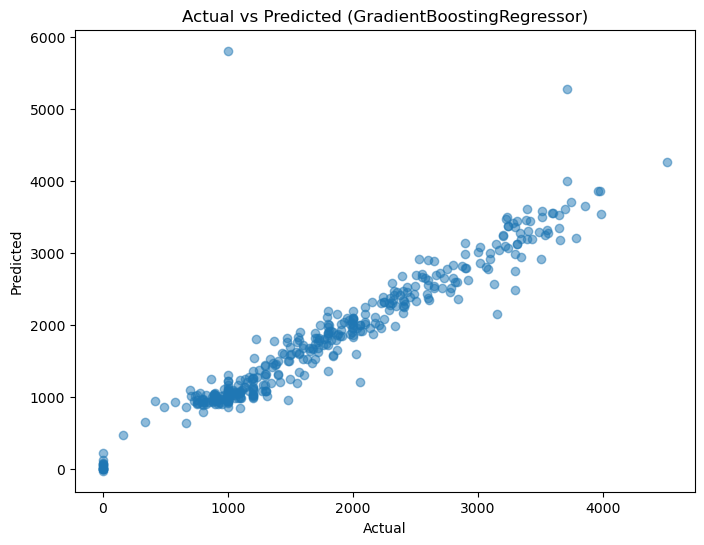

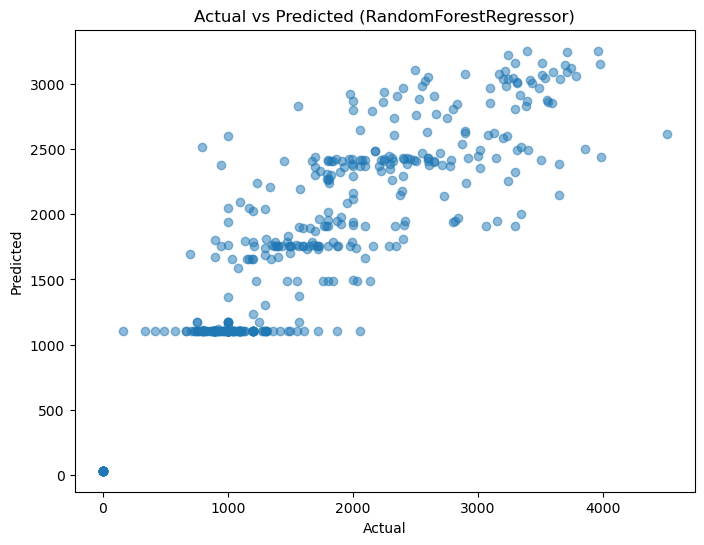

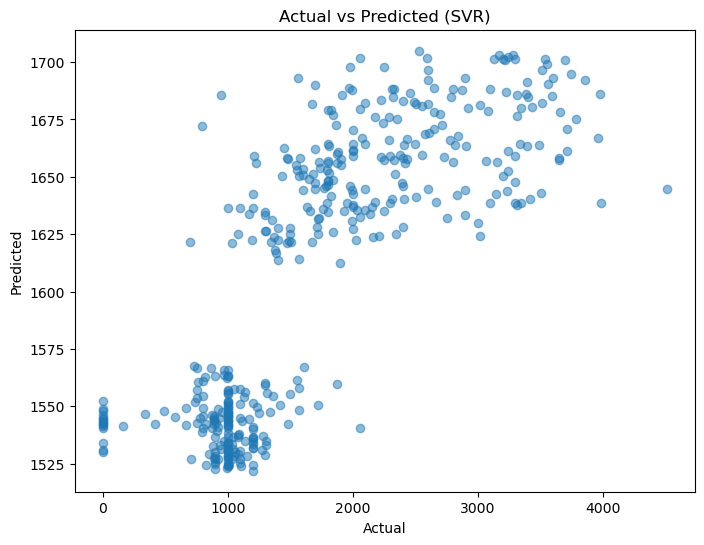

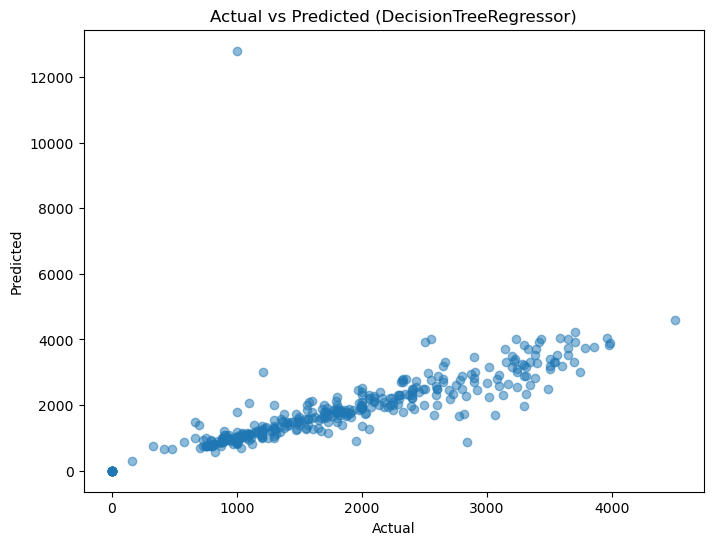

In [75]:
import matplotlib.pyplot as plt

# Define a function to plot actual vs predicted values
def plot_actual_vs_predicted(model, model_name):
    fit = model.fit(train_data, train_labels)
    y_pred = fit.predict(test_data)
    plt.figure(figsize=(8, 6))
    plt.scatter(test_labels, y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.show()

# Loop through models, fit them, predict, and plot actual vs predicted values
for model, model_name in zip(models, [model.__class__.__name__ for model in models]):
    plot_actual_vs_predicted(model, model_name)

In [90]:
model = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0)
model.fit(train_data, train_labels)

# Prepare a sample dataset for manual testing (assuming it's a small subset of test_data)
sample_data = test_data[:10]  # Take first 10 rows as sample data
sample_labels = test_labels[:10]

# Predictions
sample_predictions = model.predict(sample_data)
sample_labels


1034    2709
1176    1500
67      1029
1330    1200
650     1170
1868    1300
986     1200
552      896
1427     885
1668    1400
Name: Yield, dtype: int64

In [87]:
sample_predictions


array([2521.72028853, 1583.02847232, 1034.8795153 , 1364.88539297,
       1282.69296045, 1088.74520426, 1265.82723021,  992.16369672,
       1029.0408065 , 1321.0646047 ])

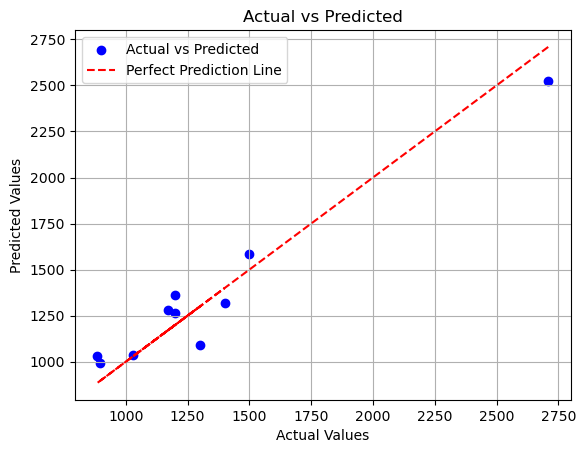

In [91]:
# Scatter plot for Actual vs Predicted
plt.scatter(sample_labels, sample_predictions, color='blue', label='Actual vs Predicted')
plt.plot(sample_labels, sample_labels, color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

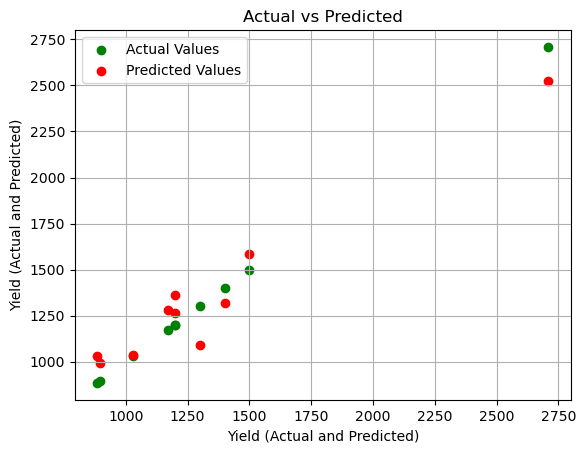

In [92]:
# Scatter plot with green dots for actual values and red dots for predicted values
plt.scatter(sample_labels, sample_labels, color='green', label='Actual Values', marker='o')
plt.scatter(sample_labels, sample_predictions, color='red', label='Predicted Values', marker='o')

plt.title('Actual vs Predicted')
plt.xlabel('Yield (Actual and Predicted)')
plt.ylabel('Yield (Actual and Predicted)')
plt.legend()
plt.grid(True)
plt.show()